
<font size="6">False positives and false negatives</font>

Why would we want to change the discrimination threshold when 0.5 seems eminently reasonable? Well there are circumstances where particularly wish to avoid having either false positives or false negatives. Let us provide and example; when testing for COVID-19, a false positive may lead to an individual having to be quarantined for a period, which may be inconvenient. However, a false negative my result in an infected individual subsequently mixing with uninfected people, and inadvertently spreading the virus. In this case a false negative would have far more undesirable consequences compared to a false positive result, and we may wish to compensate for this in our classification. Another situation when one wishes to prioritise between false negatives and false positives is in cancer screening, which is the example we shall look at here.

<font size="5">The data</font>

For data we shall use the 'Wisconsin' breast cancer dataset which is one of the example datasets that can be found on scikit learn.

<font size="5">The model</font>

For demonstration purposes the we shall perform a simple random forest classification. The parameters used here are far from optimal as our plan is actually not to aim for a good classification, but rather demonstrate the changes produced by varying the discrimination threshold.

In [24]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sn
from   sklearn.metrics import accuracy_score
from   sklearn.metrics import f1_score
from   sklearn.metrics import precision_score
from   sklearn.metrics import recall_score
from   sklearn.metrics import confusion_matrix
from   sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [25]:
#===========================================================================
# read in the dataset
#===========================================================================
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

#===========================================================================
# split the data into train and test
#===========================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#===========================================================================
# perform the classification
#===========================================================================
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,max_features=1,random_state=42)
classifier.fit(X_train, y_train);

<font size="5">Example:</font>

<font size="4">1. Discrimination threshold = 0.5</font>

First let us take a look at the confusion matrix obtained with the 'default' discrimination threshold of 0.5 of the predict() method:

The precision score is: 0.99
The recall score is: 0.96 

Accuracy score is: 0.97
The F1 score is: 0.97


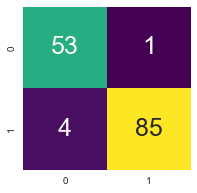

In [26]:
predictions = classifier.predict(X_test)

print("The precision score is: %.2f" % precision_score( y_test, predictions))
print("The recall score is: %.2f" % recall_score( y_test, predictions), "\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))

cm = confusion_matrix( y_test , predictions )
plt.figure(figsize = (3,3))
sn.heatmap(cm, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()

we see that we have 1 false positive, and 4 false negatives.

<font size="4">2. Discrimination threshold = 0.25</font>

The precision score is: 0.92
The recall score is: 1.00 

Accuracy score is: 0.94
The F1 score is: 0.96


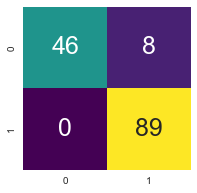

In [27]:
discrimination_threshold = 0.25
predictions = classifier.predict_proba(X_test)
predictions = (predictions[::,1] > discrimination_threshold )*1

print("The precision score is: %.2f" % precision_score( y_test, predictions))
print("The recall score is: %.2f" % recall_score( y_test, predictions),"\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))

cm = confusion_matrix( y_test , predictions )
plt.figure(figsize = (3,3))
sn.heatmap(cm, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()

we can now see that we have 8 false positives, but this time no false negatives (A recall of 1.00). However, we can see that our accuracy score has dropped from 0.97 to 0.94.

<font size="4">3. Discrimination threshold = 0.75</font>

The precision score is: 1.00
The recall score is: 0.87 

Accuracy score is: 0.92
The F1 score is: 0.93


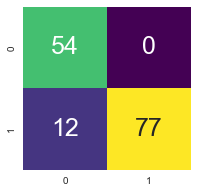

In [28]:
discrimination_threshold = 0.75
predictions = classifier.predict_proba(X_test)
predictions = (predictions[::,1] > discrimination_threshold )*1

print("The precision score is: %.2f" % precision_score( y_test, predictions))
print("The recall score is: %.2f" % recall_score( y_test, predictions), "\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))

cm = confusion_matrix( y_test , predictions )
plt.figure(figsize = (3,3))
sn.heatmap(cm, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()

we can now see that we now have 12 false negatives, but no false positives (A precision of 1.00). This time our accuracy score has dropped even further, down to 0.92.

<font size="5">Discrimination threshold plot</font>

We have looked at thresholds of 0.5 and as well as 0.25 and 0.75 by hand. However, thanks to the Discrimination Threshold Visualizer from Yellowbrick we can also automatically examine the range of values between 0 and 1, and see the results in a plot:

In [29]:
try:
    # See #1137: this allows compatibility for scikit-learn >= 0.24
    from sklearn.utils import safe_indexing
except ImportError:
    from sklearn.utils import _safe_indexing

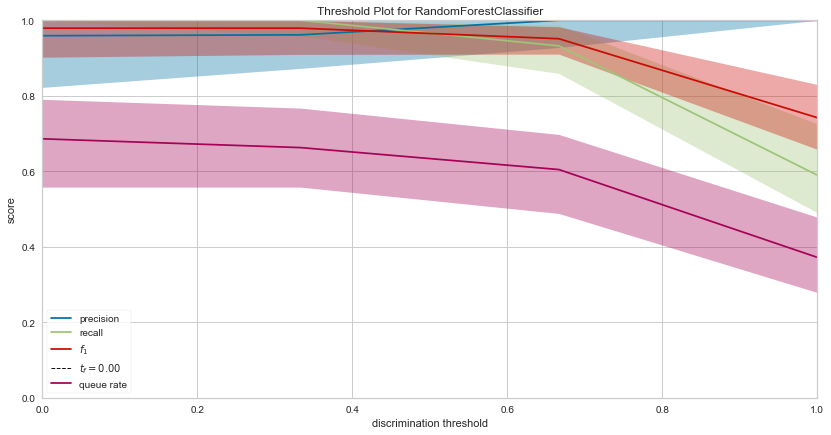

In [30]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(classifier, size=(1000, 500))

visualizer.fit(X_train, y_train)
visualizer.show();

<font size="5">Conclusion</font>

By varing the discrimination threshold we can reduce instances of either false positives or false negatives, depending on the priorities of the problem we are dealing with, although this may come at the cost of the overall performance of the classication, for example measured by the accuracy, or by the  𝐹1  score.